# World Health Organization: Obesity Among Adults (1975 - 2016)

## Table of Contents

    1 Introduction
        1.1 Dataset Information (done)
        1.2 Import & Data Cleaning
        1.3 Key Insights
    2 Global Analysis
        2.1 Global Trend
        2.2 By Continent
        2.3 By Sex
        2.4 By Country
            2.4.1 Overall 
            2.4.2 Linear Trends
        2.5 Gender differences, by Continent
        2.6 Gender differences, by Country 
        2.7 Correlation between GDP and Average Obesity (%)
    3 Are richer countries more obese
        3.1 Case Study 1 - China 
        3.2 Case Study 2 - Canada
        3.3 Case Study 3 - Pakistan
        3.4 Case Study 4 - South Africa

## 1) Introduction

### 1.1 Dataset Information

**Content**

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased obesity rates among different cohorts globally, across the socio-economic spectrum.

**References**

Obesity among adults dataset by WHO, from year 1975 to year 2016
Dataset obtained from https://apps.who.int/gho/data/node.main.A900A?lang=en

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. 
Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Aman Arora]. (2020). Obesity among adults by country, 1975-2016 [dataset]. 
Retrieved from https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016

**Inspiration**

Obesity Prevention.

In [1]:
# Import necessary libraries and dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc

# Import libraries for geographical map
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Import libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:\\google-drive\\3. Projects in Progress\\1. Data Analytics\\Kaggle - Obesity among adults 1975 - 2016")
raw_data = pd.read_csv('obesity-cleaned.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


In [3]:
raw_data.describe()

,Unnamed: 0,Year
count,24570.000000,24570.000000
mean,12284.500000,1995.500000
std,7092.892393,12.121165
min,0.000000,1975.000000
25%,6142.250000,1985.000000
50%,12284.500000,1995.500000
75%,18426.750000,2006.000000
max,24569.000000,2016.000000


#### Data Cleaning Notes

1) There were No NA values (done)

2) Continent for each observation was added to the dataset (done)

3) Separate the Obesity Rates into the following: (done)
    a) Average Obestiy Rate by country / year
    b) Minimum Obesity Rate by country / year
    c) Maximum Obesity Rate by country / year
    
4) Add the gdp by country / year for comparative analysis (done)

In [4]:
# 1. Remove NA Values
raw_data.isnull().any()

Unnamed: 0     False
Country        False
Year           False
Obesity (%)    False
Sex            False
dtype: bool

In [5]:
#2. Add continent for each observation

# Function to define the continent by country
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code =pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# Function to change the name of certain countries in raw_data
def changename(old_name, new_name):
    for i in range(len(raw_data['Country'])):
        if(raw_data['Country'][i] == old_name):
           raw_data['Country'][i] = new_name 

# Change name of certain countries
changename('Bolivia (Plurinational State of)', 'Bolivia')
changename('Iran (Islamic Republic of)', 'Iran')     
changename('Micronesia (Federated States of)','Micronesia')
changename('Republic of Korea','South Korea')
changename('Sudan (former)','Sudan')
changename('Timor-Leste','East Timor')
changename('Venezuela (Bolivarian Republic of)','Venezuela')
        
# Create a continent column
raw_data['continent'] = ' '

# Convert the name of the country to continent
for i in range(len(raw_data['Country'])):
    try:
        val = country_to_continent(raw_data['Country'][i])
        raw_data['continent'][i] = val
    except:
        pass
        #print(raw_data['Country'][i])

# Manually input East Timor as part of Asia
for i in range(len(raw_data['Country'])):
    if raw_data['Country'][i] == 'East Timor':
        raw_data['continent'][i] = 'Asia'

In [6]:
#3) Separate the Obesity Rates into the following:
#   a) Average Obestiy Rate by country / year
#   b) Minimum Obesity Rate by country / year
#   c) Maximum Obesity Rate by country / year

# Get the Obesity Average (%) for each year and country
raw_data['Obesity_Avg(%)'] = 1.2
for i in range(len(raw_data['Obesity (%)'])):
    try:
        x = float(raw_data['Obesity (%)'][i].split(' [')[0])
        raw_data['Obesity_Avg(%)'][i] = x
    except:
        pass
    
# Get the Obesity Start (%) for each year and country
raw_data['Obesity_Start(%)'] = 1.2
for i in range(len(raw_data['Obesity_Start(%)'])):
    try:
        x = float(raw_data['Obesity (%)'][i].split('-')[0].split(' [')[1])
        raw_data['Obesity_Start(%)'][i] = x
    except:
        pass
    
# Get the Obesity End (%) for each year and country
raw_data['Obesity_End(%)'] = 1.2
for i in range(len(raw_data['Obesity_Start(%)'])):
    try:
        x = float(raw_data['Obesity (%)'][i].split('-')[1].split(']')[0])
        raw_data['Obesity_End(%)'][i] = x
    except:
        pass
    
# Remove any values that don't have any data
raw_data = raw_data[~raw_data['Obesity (%)'].isin(['No data'])]

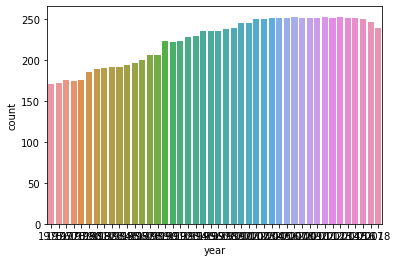

In [7]:
# 4) Add the gdp by country / year for comparative analysis

# Read in the gdp data and delete unnecessary rows and columns
gdp = pd.read_csv('gdp.csv')
gdp.drop(['Country Code','Series Name', 'Series Code'], axis = 1, inplace = True)

# Create a new dataset using melt
gdp_new = gdp.melt('Country Name', var_name = 'Year', value_name = 'gdp')
gdp_new[['Year']] = gdp_new['Year'].str.split('.', expand=True)

# Separate the year column
gdp_new['year'] = 0
for i in range(len(gdp_new['Year'])):
        x = int(gdp_new['Year'][i].split(' ')[0])
        gdp_new['year'][i] = x
        
# Replace the gdp '..' to 0
for i in range(len(gdp_new['gdp'])):
    if gdp_new['gdp'][i] == '..':
        gdp_new['gdp'][i] = 0
        
# Find the number of gdp values
sns.countplot(gdp_new[~gdp_new['gdp'].isin([0])].year)

# Create a new column as a unique identifier for matching with raw_data
gdp_new['CountryYear'] = 0
for i in range(len(gdp_new['year'])):
    gdp_new['CountryYear'][i] = gdp_new['Country Name'][i] + str(gdp_new['year'][i])
    
# Create a new column as a unique identifier for matching with gdp_new
raw_data = raw_data.reset_index(drop = True)
raw_data['CountryYear'] = 0
for i in range(len(raw_data['Country'])):
    raw_data['CountryYear'][i] = raw_data['Country'][i] + str(raw_data['Year'][i])

# Create the new dataset using CountryYear as the unique identifier
# Add the gdp to the raw_data dataset
raw_data = pd.merge(left = raw_data, right = gdp_new, how = 'inner', on = 'CountryYear')
raw_data['gdp'] = raw_data['gdp'].astype(float)

### 1.3 Key Insights

- 
- 
- 

## 2) Global Analysis

### 2.1 Global Trend

In [8]:
# Function that will groupby each column for visualization
def groupbyfunc(column):
    varname = raw_data.groupby(column).mean()
    list1 = sorted(raw_data[column].unique())
    varname[column] = list1
    return varname

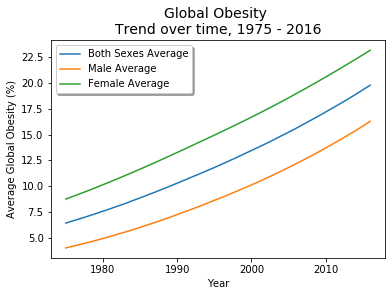

In [9]:
# Create Global Trend
global_trend = groupbyfunc('year')

# Line Plot that shows the Global Obesity Trend
sns.lineplot(data = raw_data[raw_data['Sex'] == 'Both sexes'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Both Sexes Average')
sns.lineplot(data = raw_data[raw_data['Sex'] == 'Male'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Male Average')
sns.lineplot(data = raw_data[raw_data['Sex'] == 'Female'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Female Average')
plt.title('Global Obesity \nTrend over time, 1975 - 2016', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Average Global Obesity (%)')
plt.legend(frameon = True, fancybox = True, shadow = True,prop = {'size':10})
plt.show()

In [10]:
max_rate = global_trend['Obesity_Avg(%)'].max()
print('Maximum Global Obesity (2016): ',str(round(max_rate,2))+'%')
print('Average Global Obesity (1975 - 2016): ',str(round(raw_data['Obesity_Avg(%)'].mean(),2))+'%')

Maximum Global Obesity (2016):  19.75%
Average Global Obesity (1975 - 2016):  12.31%


*The dashed line is the global average obesity rate from 1975 - 2016. This is calculated as 12.31%*

**Insights**
- The average obesity rate has continued to steadily increase as time goes on
- The male obesity rate is lower than the female rate for the period 1975 - 2016. This can largely be explained by the differences between the male and female body.

### 2.2) By Continent

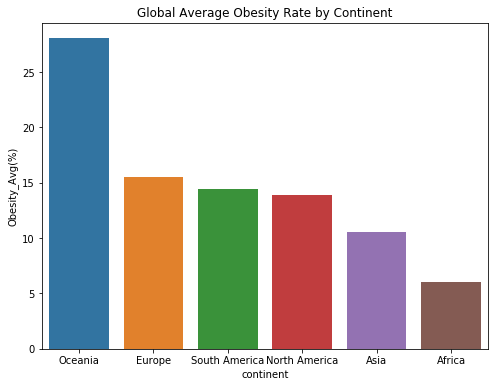

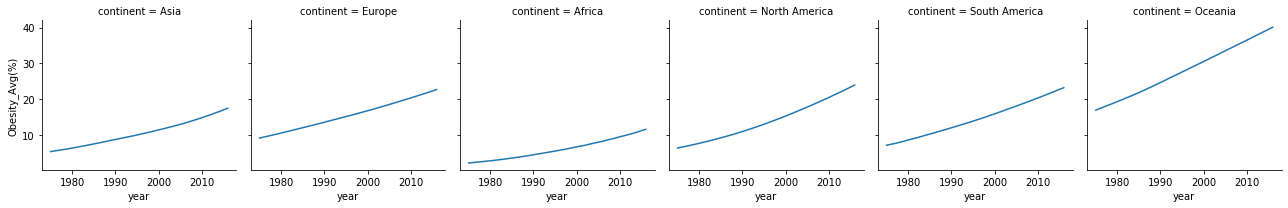

In [11]:
# Create a dataset showing the trend by continent
continent_trend = raw_data[raw_data['Sex'] == 'Both sexes'].groupby('continent').mean()
continent_trend = continent_trend.sort_values('Obesity_Avg(%)', ascending = False)
continent_trend['continent'] = ['Oceania', 'Europe', 'South America', 'North America', 'Asia', 'Africa']

# Plot Average Obesity Rate by continent
plt.figure(figsize = (8,6))
sns.barplot(data = continent_trend, x = 'continent', y = 'Obesity_Avg(%)')
plt.title('Global Average Obesity Rate by Continent')

# Plot the trend of global average obesity rate by continent over 1985-2015
g = sns.FacetGrid(raw_data[raw_data['Sex'] == 'Both sexes'], col = 'continent')
g = g.map(sns.lineplot, 'year','Obesity_Avg(%)', ci = None)

*Insights*

- The Oceania Obesity rate is the highest and has rapidly increased in the last few years
- The Asia Obesity Curve has begun to get steeper, this can largely be due to the increase in GDP and other socioeconomic and cultural factors
- North America's curve is very concerning due to the curve being steeper

### 2.3) By Sex

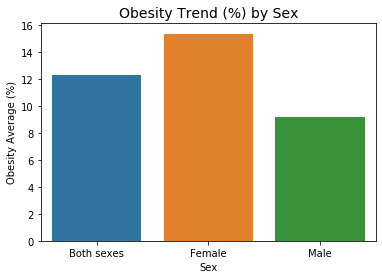

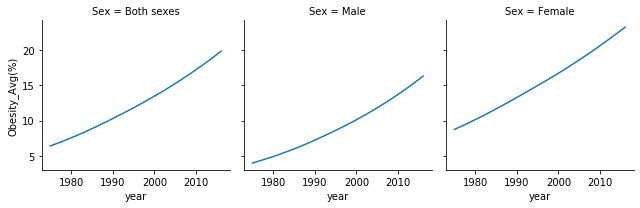

In [12]:
# Create gender trend dataset
gender_trend = groupbyfunc('Sex')

# Show the visual for the boxplot
sns.barplot(data = gender_trend, x = 'Sex', y = 'Obesity_Avg(%)')
plt.title('Obesity Trend (%) by Sex', size = 14)
plt.ylabel('Obesity Average (%)')

# Plot the trend of global suicides by sex over 1975 - 2016
g = sns.FacetGrid(raw_data, col = 'Sex')
g = g.map(sns.lineplot, 'year', 'Obesity_Avg(%)', ci = None)

*Insights*

- The rate of obesity for women is higher than the obesity rate for men
- The higher rate for obesity can be explained by the biological differences between men and women. Women, on average, have a higher body fat (%) than men. (Source: https://www.medicinenet.com/script/main/art.asp?articlekey=8519)
- Obesity rates continue to increase as time goes on. The reasons will be explored further.

### 2.4) By Country

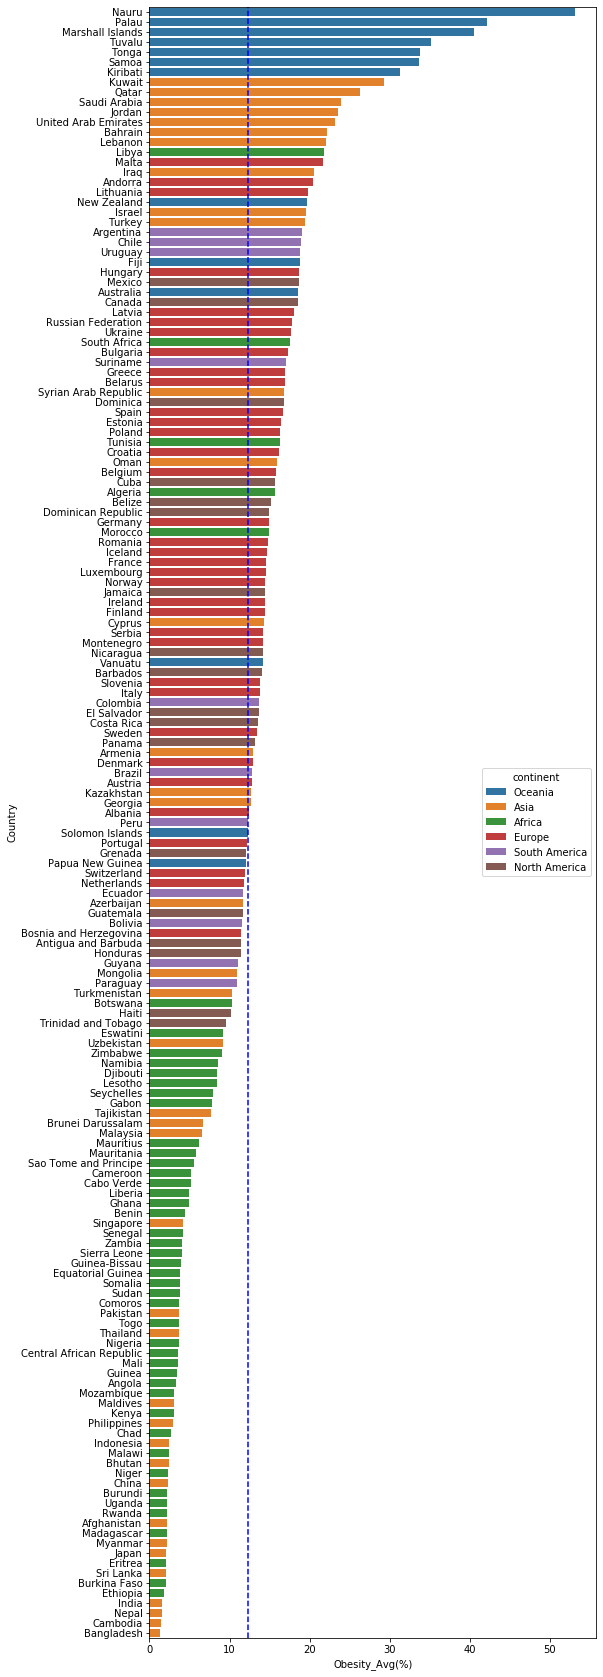

In [13]:
# Create a dataset showing the trend by country
country_trend = raw_data[raw_data['Sex'] == 'Both sexes']
country_trend = groupbyfunc('Country')

# Add the continent column
df1 = raw_data[['Country','continent']]
df1 = df1.drop_duplicates()
df1.reset_index(drop=True, inplace=True)
country_trend['continent'] = ''
for i in range(len(country_trend['Country'])):
    country_trend['continent'][i] = df1['continent'][i]
    
# Plot barplot using country and continent
country_trend = country_trend.sort_values('Obesity_Avg(%)', ascending = False).reset_index(drop = True)
plt.figure(figsize = (8,30))
ax = sns.barplot(data = country_trend, x = 'Obesity_Avg(%)', y = 'Country', hue = 'continent', dodge = False)
plt.axvline(x = raw_data[raw_data['Sex'] == 'Both sexes']['Obesity_Avg(%)'].mean(), color = 'b', linestyle = '--')

*Insights*

- Oceania's obesity rate has consistently remained the highest from all countries which is quite concerning
- We also noticed that many GCC countries have the highest Obesity rates. This can be explained by the sudden increase in GDP and other socioeconomic factors. (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5667520/)
- We also see that almost all African countries have average obesity rates less than the global average.
- We also see that many countries in Europe and Americas consistently have high obesity rates

In [14]:
# Create a chloropleth map to show Average Obesity (%)
data = dict(
            type = 'choropleth',
            locations = country_trend['Country'],
            locationmode = 'country names',
            z = country_trend['Obesity_Avg(%)'],
            text = country_trend['Country'],
            colorbar = {'title':'Obesity (%)'})
layout = dict(
              title = 'Average Obesity (%) from 1975 - 2016',
              geo = dict(
                         showframe = False))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

Text(0.5, 0, 'Change per year (Average Obesity (%))')

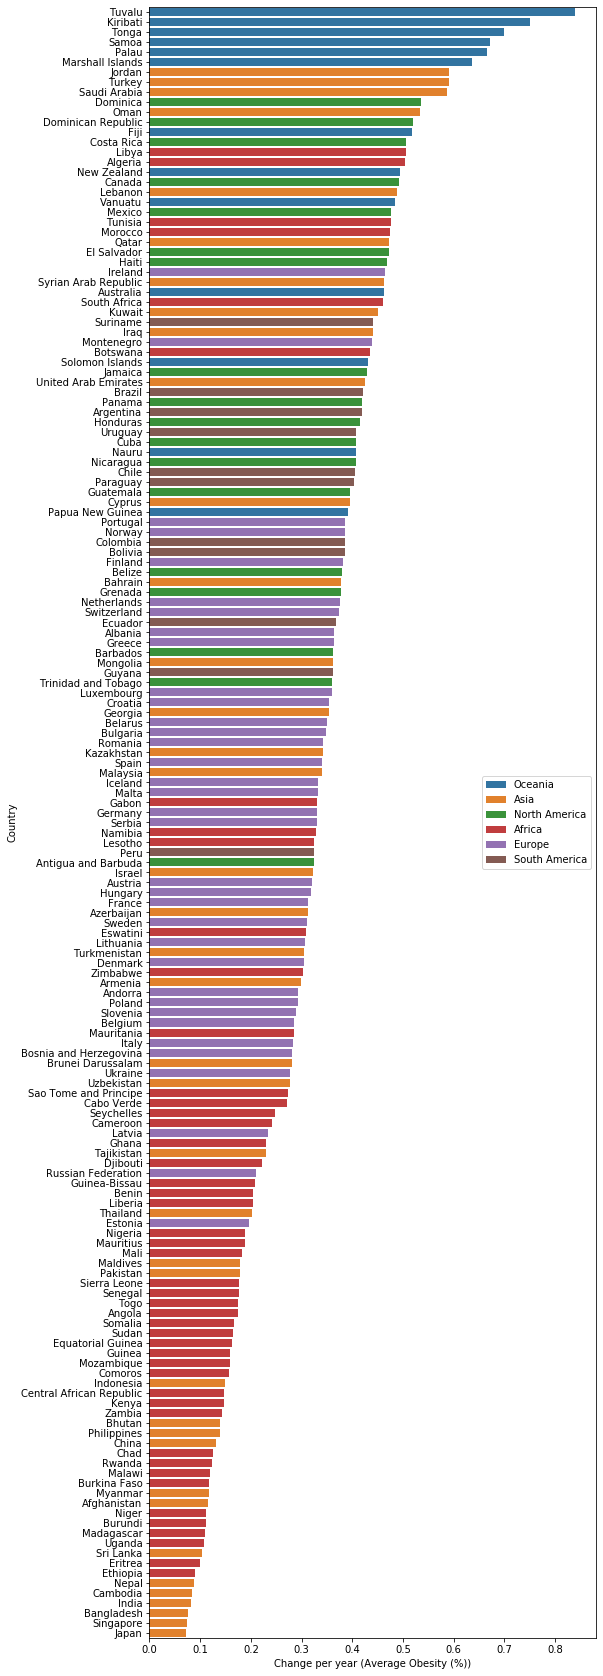

In [15]:
# Create a regression coefficient for each country
raw_data1 = raw_data[raw_data['Sex'] == 'Both sexes']
raw_data1['regression_coeff'] = ''
for i in range(len(country_trend['Country'])):
    df = raw_data1[raw_data1['Country'] == country_trend['Country'][i]][['year','Obesity_Avg(%)']]
    x = df[['year']]
    y = df['Obesity_Avg(%)']
    lm = LinearRegression()
    lm.fit(x,y)
    reg = lm.coef_
    country_trend.loc[i,'regression_coeff']= reg[0]
    
# Sort country_trend dataset according to regression coefficient
country_trend = country_trend.sort_values('regression_coeff', ascending = False).reset_index(drop = True)

# Plot the regression trend for each country
plt.figure(figsize=(8,30))
sns.barplot(data = country_trend, x = 'regression_coeff', y = 'Country', hue = 'continent', dodge = False)
plt.legend(loc = 'center right')
plt.xlabel('Change per year (Average Obesity (%))')


*Insights*

- The high obesity rate in Oceanic countries is quite concerning given the low population in most of these countries.
- We see that many Middle Eastern countries have been increasing obesity quite rapidly
- We can also see that many African countries consistently have low Average Obesity

### 2.5) Gender differences, by Continent

Text(0.5, 1.0, 'Gender Disparity, by continent')

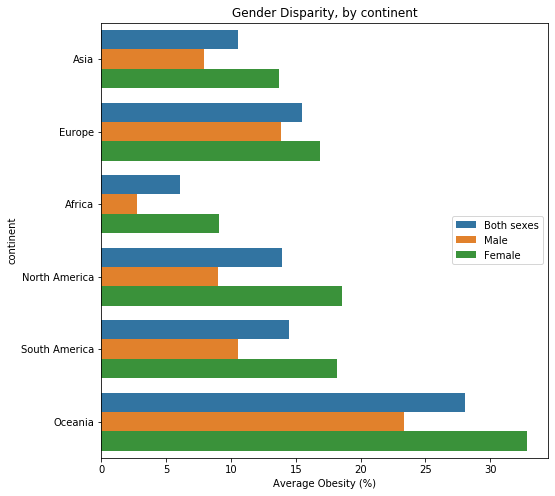

In [16]:
# Show gender disparity by continent
plt.figure(figsize=(8,8))
sns.barplot(data = raw_data, x = 'Obesity_Avg(%)', y = 'continent', hue = 'Sex', ci = None)
plt.legend(loc = 'center right')
plt.xlabel('Average Obesity (%)')
plt.title('Gender Disparity, by continent')

Obesity Rate - Both Sexes


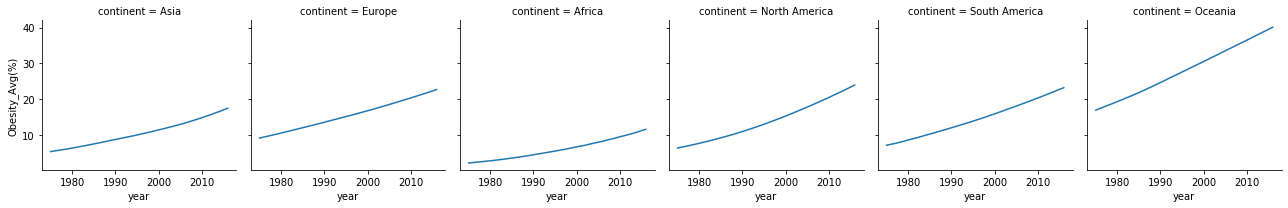

In [17]:
# Plot the trend of global suicides by sex over 1975 - 2016 (Both sexes)
print('Obesity Rate - Both Sexes')
g = sns.FacetGrid(raw_data[raw_data['Sex'] == 'Both sexes'], col = 'continent')
g = g.map(sns.lineplot, 'year', 'Obesity_Avg(%)', ci = None)

Obesity Rate - Male


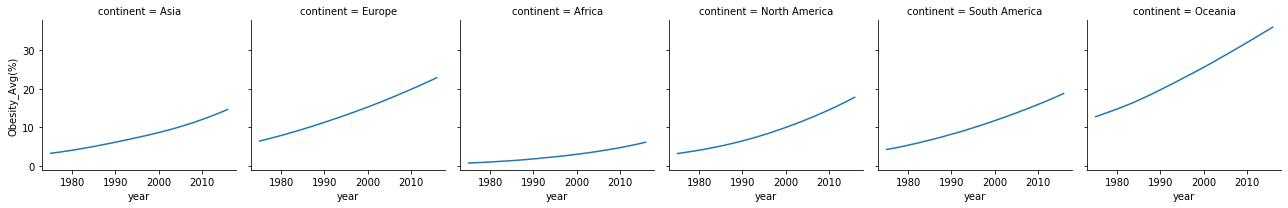

In [18]:
# Plot the trend of global suicides by sex over 1975 - 2016 (Male)
print('Obesity Rate - Male')
g = sns.FacetGrid(raw_data[raw_data['Sex'] == 'Male'], col = 'continent')
g = g.map(sns.lineplot, 'year', 'Obesity_Avg(%)', ci = None)

Obesity Rate - Female


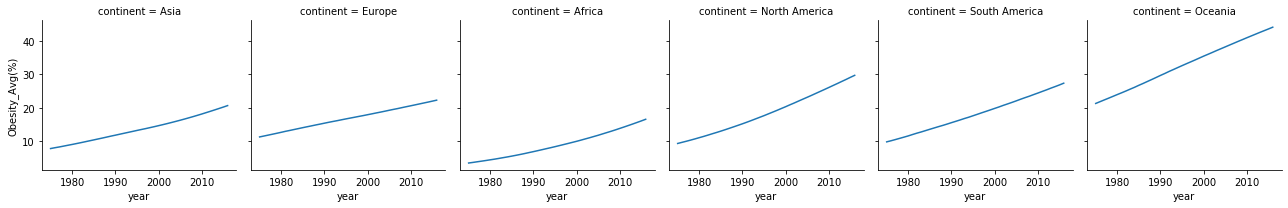

In [19]:
# Plot the trend of global suicides by sex over 1975 - 2016 (Female)
print('Obesity Rate - Female')
g = sns.FacetGrid(raw_data[raw_data['Sex'] == 'Female'], col = 'continent')
g = g.map(sns.lineplot, 'year', 'Obesity_Avg(%)', ci = None)

*Insights*

- We again see that females tend to have a higher Average Obesity Rate as compared to men
- Africa's obesity rate seems to be consistently lower.
- The European curve for males is much steeper than females. We can infer that obesity amongst males is increasing rapidly as compared to females

### 2.6) Gender differences, by Country

Text(0.5, 0, 'Average Obesity (%) from 1975 - 2016')

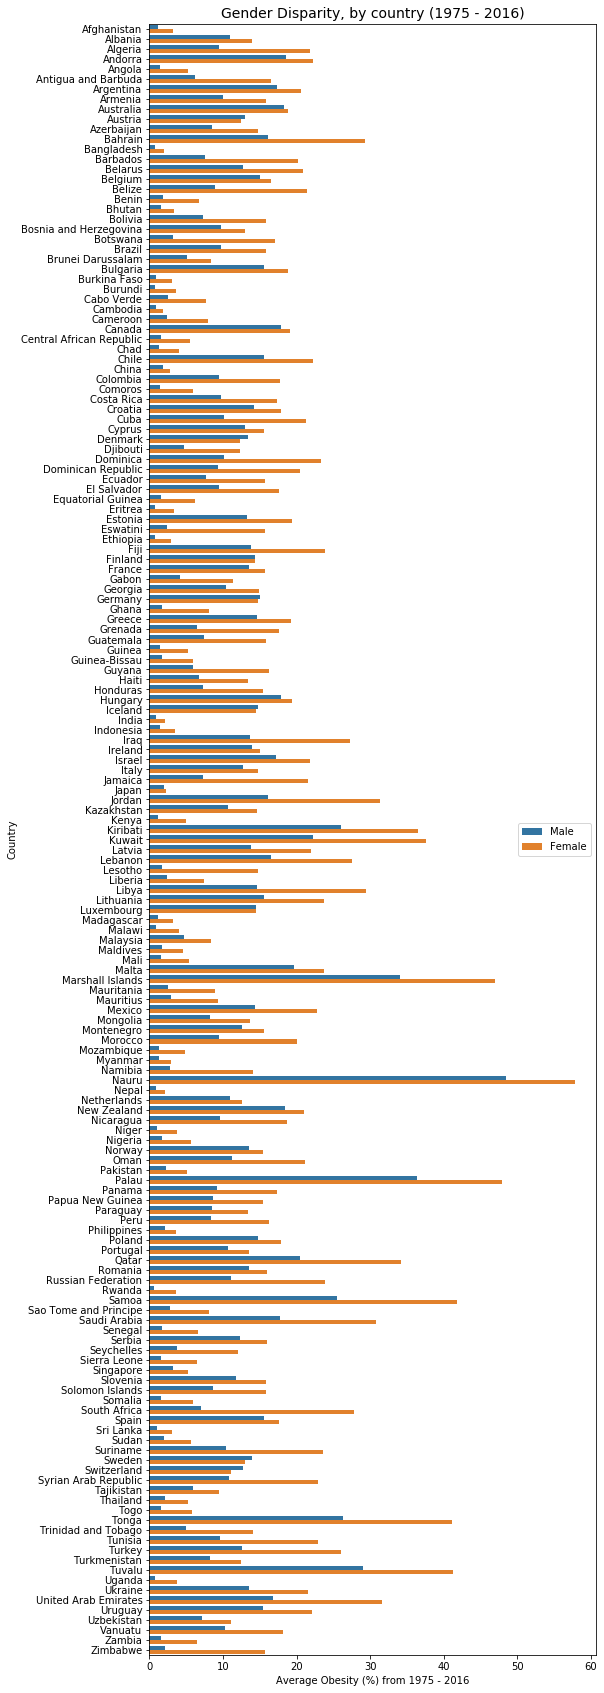

In [20]:
plt.figure(figsize=(8,30))
sns.barplot(data = raw_data[raw_data['Sex'] != 'Both sexes'], x = 'Obesity_Avg(%)', y = 'Country', hue = 'Sex', ci = None)
plt.legend(loc = 'center right')
plt.title('Gender Disparity, by country (1975 - 2016)', fontsize = 14)
plt.xlabel('Average Obesity (%) from 1975 - 2016')

*Insights*

- We see consistently that females have a higher Average Obesity (%) from 1975 to 2016
- We see that many African countries have very high Average Obesity (%) whereas countries in other continents have a more even male to female Average Obesity (%)

### 2.7) Correlation between GDP and Average Obesity (%) 

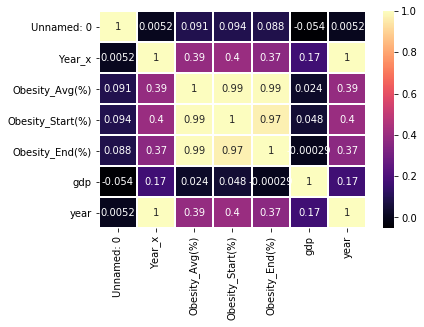

In [44]:
corr_data = raw_data.corr()
sns.heatmap(corr_data, annot = True, cmap = 'magma', linecolor = 'white', linewidth = 1)

*Insights*

- We see that gdp is not highly correlated with the Average Obesity (%). 

## 3) Are richer countries more obese

### 3.1) Case Study 1 - China 

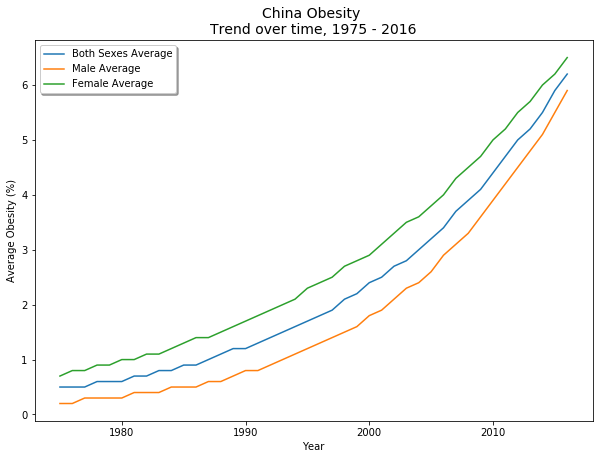

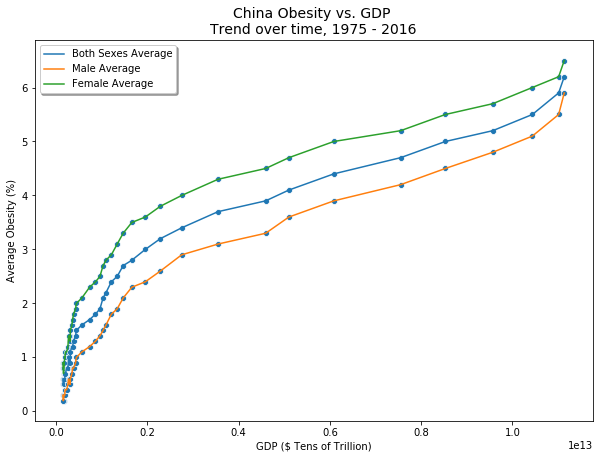

In [39]:
# Create the china dataset
china_trend = raw_data[raw_data['Country'] == 'China']

# Plot China's Obesity over time (1975 - 2016)
plt.figure(figsize=(10,7))
sns.lineplot(data = china_trend[china_trend['Sex'] == 'Both sexes'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Both Sexes Average')
sns.lineplot(data = china_trend[china_trend['Sex'] == 'Male'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Male Average')
sns.lineplot(data = china_trend[china_trend['Sex'] == 'Female'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Female Average')
plt.title('China Obesity \nTrend over time, 1975 - 2016', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Average Obesity (%)')
plt.legend(frameon = True, fancybox = True, shadow = True,prop = {'size':10})
plt.show()

# Plot China's Obesity vs. GDP (1975 - 2016)
plt.figure(figsize=(10,7))
sns.lineplot(data = china_trend[china_trend['Sex'] == 'Both sexes'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Both Sexes Average')
sns.lineplot(data = china_trend[china_trend['Sex'] == 'Male'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Male Average')
sns.lineplot(data = china_trend[china_trend['Sex'] == 'Female'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Female Average')
sns.scatterplot(data = china_trend, x = 'gdp', y = 'Obesity_Avg(%)')
plt.title('China Obesity vs. GDP \nTrend over time, 1975 - 2016', fontsize = 14)
plt.xlabel('GDP ($ Tens of Trillion)')
plt.ylabel('Average Obesity (%)')
plt.legend(frameon = True, fancybox = True, shadow = True,prop = {'size':10})
plt.show()

*Insights*

- We see that overtime China's obesity rate has increased quite dramatically. From graph 1, we see that the curve obesity curve has become steeper after 2010. 
- We also see that there is a large disparity between male and female obesity rate (%)
- We also see that as the GDP has increased, the Obesity (%) in China has increased. There was a sharp increase in obesity as the GDP climbed to $200 billion. This can be due to a sudden increase in fast food facilities offered to the general public.

### 3.2) Case Study 2 - Canada 

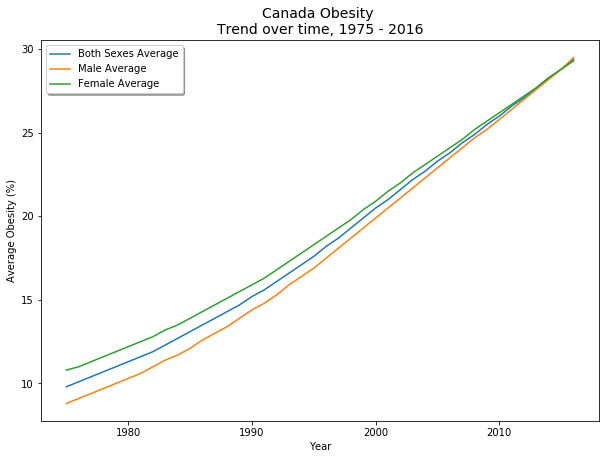

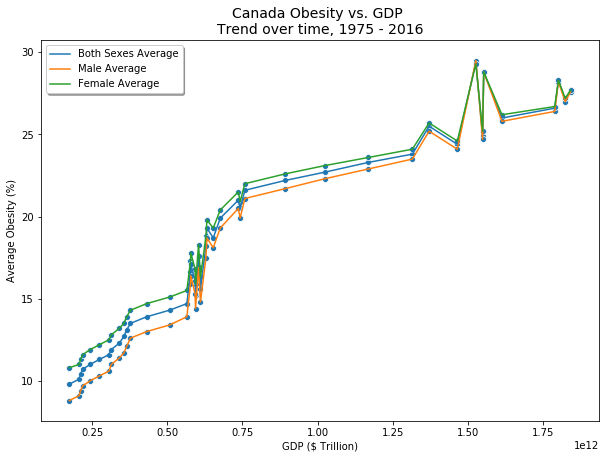

In [38]:
# Create the Canada dataset
canada_trend = raw_data[raw_data['Country'] == 'Canada']

# Plot Canada's Obesity over time (1975 - 2016)
plt.figure(figsize=(10,7))
sns.lineplot(data = canada_trend[canada_trend['Sex'] == 'Both sexes'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Both Sexes Average')
sns.lineplot(data = canada_trend[canada_trend['Sex'] == 'Male'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Male Average')
sns.lineplot(data = canada_trend[canada_trend['Sex'] == 'Female'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Female Average')
plt.title('Canada Obesity \nTrend over time, 1975 - 2016', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Average Obesity (%)')
plt.legend(frameon = True, fancybox = True, shadow = True,prop = {'size':10})
plt.show()

# Plot Canada's Obesity vs. GDP (1975 - 2016)
plt.figure(figsize=(10,7))
sns.lineplot(data = canada_trend[canada_trend['Sex'] == 'Both sexes'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Both Sexes Average')
sns.lineplot(data = canada_trend[canada_trend['Sex'] == 'Male'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Male Average')
sns.lineplot(data = canada_trend[canada_trend['Sex'] == 'Female'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Female Average')
sns.scatterplot(data = canada_trend, x = 'gdp', y = 'Obesity_Avg(%)')
plt.title('Canada Obesity vs. GDP \nTrend over time, 1975 - 2016', fontsize = 14)
plt.xlabel('GDP ($ Trillion)')
plt.ylabel('Average Obesity (%)')
plt.legend(frameon = True, fancybox = True, shadow = True,prop = {'size':10})
plt.show()

*Insights*

- From graph 1, we see that Canada's obesity has continued to increase at a gradual pace.
- We also see that the gap of Average Obesity (%) between male and female has continued to decrease 
- We see that the sudden spikes occur due to fluctuations in GDP. We see that the Average Obesity Rate (%) tends to drop in years the GDP remains the same.

### 3.3) Case Study 3 - Pakistan 

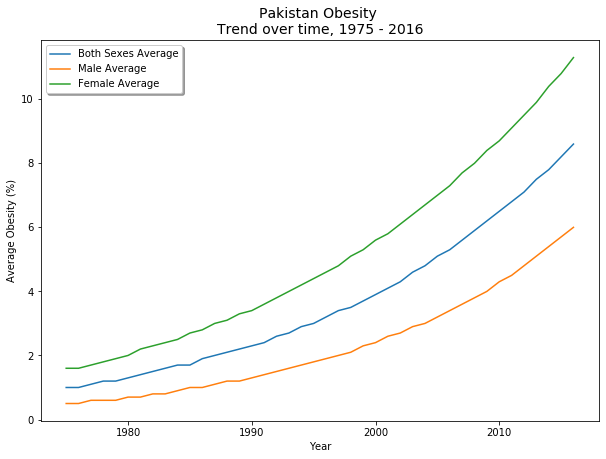

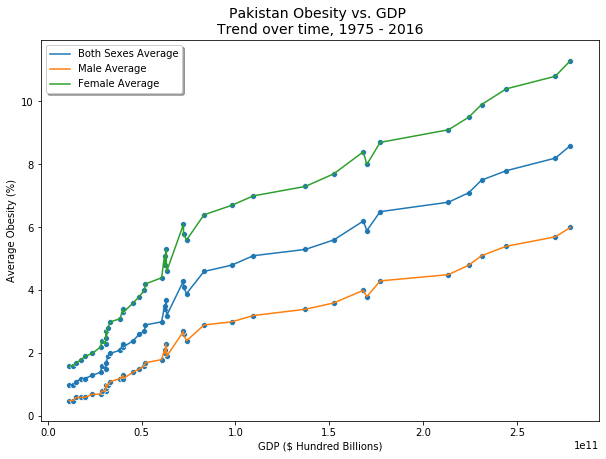

In [40]:
# Create the Pakistan dataset
pakistan_trend = raw_data[raw_data['Country'] == 'Pakistan']

# Plot Pakistan's Obesity over time (1975 - 2016)
plt.figure(figsize=(10,7))
sns.lineplot(data = pakistan_trend[pakistan_trend['Sex'] == 'Both sexes'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Both Sexes Average')
sns.lineplot(data = pakistan_trend[pakistan_trend['Sex'] == 'Male'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Male Average')
sns.lineplot(data = pakistan_trend[pakistan_trend['Sex'] == 'Female'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Female Average')
plt.title('Pakistan Obesity \nTrend over time, 1975 - 2016', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Average Obesity (%)')
plt.legend(frameon = True, fancybox = True, shadow = True,prop = {'size':10})
plt.show()

# Plot Pakistan's Obesity vs. GDP (1975 - 2016)
plt.figure(figsize=(10,7))
sns.lineplot(data = pakistan_trend[pakistan_trend['Sex'] == 'Both sexes'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Both Sexes Average')
sns.lineplot(data = pakistan_trend[pakistan_trend['Sex'] == 'Male'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Male Average')
sns.lineplot(data = pakistan_trend[pakistan_trend['Sex'] == 'Female'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Female Average')
sns.scatterplot(data = pakistan_trend, x = 'gdp', y = 'Obesity_Avg(%)')
plt.title('Pakistan Obesity vs. GDP \nTrend over time, 1975 - 2016', fontsize = 14)
plt.xlabel('GDP ($ Hundred Billions)')
plt.ylabel('Average Obesity (%)')
plt.legend(frameon = True, fancybox = True, shadow = True,prop = {'size':10})
plt.show()

*Insights*

- We see that over time Pakistan's obesity rate has continued to increase. 
- We also see that there is a large and growing disparity of Obesity Rates (%) between Female and Male. The Female Obesity Rate (%) also has a steeper curve than the Male Obesity Rate.
- We also see that there has been a continuous increase in obesity rates.
- The fluctuations in GDP causes a direct affect on the Average Obesity (%). As GDP decreases, so does the Average

### 3.4) Case Study 4 - South Africa

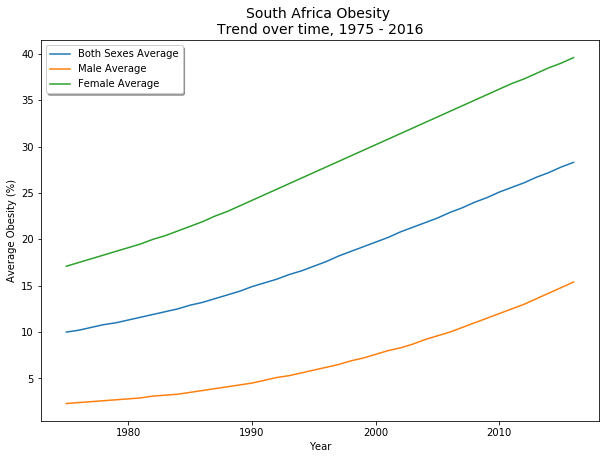

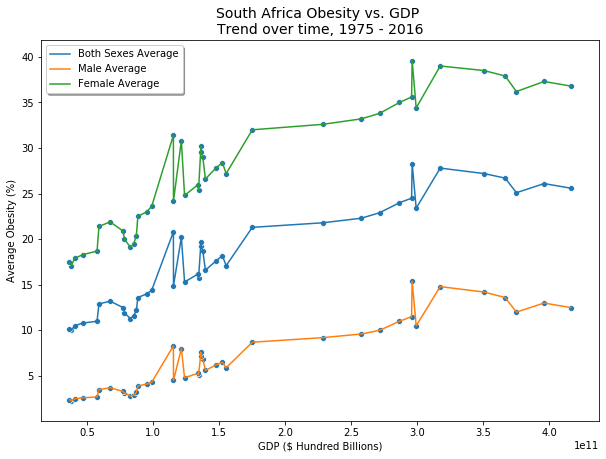

In [43]:
# Create the South Africa dataset
southafrica_trend = raw_data[raw_data['Country'] == 'South Africa']

# Plot South Africa's Obesity over time (1975 - 2016)
plt.figure(figsize=(10,7))
sns.lineplot(data = southafrica_trend[southafrica_trend['Sex'] == 'Both sexes'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Both Sexes Average')
sns.lineplot(data = southafrica_trend[southafrica_trend['Sex'] == 'Male'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Male Average')
sns.lineplot(data = southafrica_trend[southafrica_trend['Sex'] == 'Female'], x = 'year', y = 'Obesity_Avg(%)', ci = None, label = 'Female Average')
plt.title('South Africa Obesity \nTrend over time, 1975 - 2016', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Average Obesity (%)')
plt.legend(frameon = True, fancybox = True, shadow = True,prop = {'size':10})
plt.show()

# Plot South Africa's Obesity vs. GDP (1975 - 2016)
plt.figure(figsize=(10,7))
sns.lineplot(data = southafrica_trend[southafrica_trend['Sex'] == 'Both sexes'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Both Sexes Average')
sns.lineplot(data = southafrica_trend[southafrica_trend['Sex'] == 'Male'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Male Average')
sns.lineplot(data = southafrica_trend[southafrica_trend['Sex'] == 'Female'], x = 'gdp', y = 'Obesity_Avg(%)', label = 'Female Average')
sns.scatterplot(data = southafrica_trend, x = 'gdp', y = 'Obesity_Avg(%)')
plt.title('South Africa Obesity vs. GDP \nTrend over time, 1975 - 2016', fontsize = 14)
plt.xlabel('GDP ($ Hundred Billions)')
plt.ylabel('Average Obesity (%)')
plt.legend(frameon = True, fancybox = True, shadow = True,prop = {'size':10})
plt.show()

*Insights*

- We see that over time South Africa's obesity rate has continued to increase.
- We also see that there is a large and growing disparity of Obesity Rates (%) between Female and Male. However, the growth rate of obesity between men and women has remained relatively the same.
- We see that Obesity Rates (%) tend to drop in years where GDP has not grown. This can be attributed to lower purchasing power, unemployment and other socioeconomic factors resulting from a decrease in the economy.